# 공공API (1) -관광정보
## 1. 오픈API 정의
 - 오픈: Open, 개방, 공개  
 - API: Application Programming Interface, 응용 프로그램 인터페이스  
 - 오픈 API: 일반적으로 웹 서비스(Web Services)형태로써  특정 기능 혹은 콘텐츠 서비스를 위해 외부에 접근 방법을 공개한 형태  

## 2. 오픈 API 동작 원리(1)
### - 이용자 입장에서 동작 단계
#### >요청(request)하는 단계
- GET방식
- POST방식
    
#### > 결과 (response)값을 받아 해석(parse)하는 단계

## 3. 오픈API 동작원리(2)
- [참고] HTTP 프로토콜을 이용해 클라이언트에서 서버에데이터를 전달하는 방법 

### > GET 방식
 - 링크(link) 할 수 있는 URL을 가지고 있는 것 
 #### [형식] 요청URL?변수1=변수값1&변수2=변수값2...  (‘&’표기로 변수구분) 
 
### > POST 방식
 - 폼(form)을 이용해서 수행(submit)하는 형태 
 - 수행 내용이 (body 안에) 숨겨져서 보내짐 
 - 서버의 값이나 상태를 바꾸기 위해 사용 

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'#한글 깨짐 해결
plt.rcParams['axes.unicode_minus'] = False  #- 깨짐 해결

In [102]:
#url='http://api.visitkorea.or.kr/openapi/service/rest/KorService/locationBasedList?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&numOfRows=10&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&contentTypeId=15&mapX=126.981611&mapY=37.568477&radius=1000&listYN=Y'
# url='http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&numOfRows=500&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101'
# print(url)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&numOfRows=500&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101


In [247]:
KEY='Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D'
행수=500
시작일='20210101'
url1='http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey='+KEY
url2='&numOfRows='+ str(행수) + '&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=' + 시작일
url=url1+url2
print(url)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&numOfRows=500&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101


In [248]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')

In [249]:
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>0000</resultcode><resultmsg>OK</resultmsg></header><body><items><item><addr1>경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터</addr1><areacode>31</areacode><cat1>A02</cat1><cat2>A0208</cat2><cat3>A02081300</cat3><contentid>2704330</contentid><contenttypeid>15</contenttypeid><createdtime>20210119152643</createdtime><eventenddate>20211231</eventenddate><eventstartdate>20210116</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/26/2704326_image2_1.JPG</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/26/2704326_image2_1.JPG</firstimage2><mapx>127.6574135888</mapx><mapy>37.5145504080</mapy><mlevel>6</mlevel><modifiedtime>20210119152643</modifiedtime><readcount>0</readcount><sigungucode>19</sigungucode><tel>031-775-5205</tel><title>가족끼리 빙어체험 2021</title></item><item><addr1>대구광역시 북구 호암로 15</addr1><addr2>(칠성동2가)</addr2><areacode>4</areacode><cat1>A02</cat1><cat2>A0208</cat2><cat3>A02080400

In [250]:
data=soup.find_all('item')
len(data)

125

In [251]:
data=soup.find_all('item')
con_list=[]

for item in data:
    if item.find('title'):
        Title=item.find('title').text
    else:
        Title=None
    if item.find('eventstartdate'):
        Sdate=item.find('eventstartdate').text
    else:
        Sdate=None
    if item.find('eventenddate'):
        Edate=item.find('eventenddate').text
    else:
        Edate=None
    if item.find('addr1'):
        Addr=item.find('addr1').text
    else:
        Addr=None
    if item.find('mapy'):
        mapY=item.find('mapy').text
    if item.find('cat1'):
        cat1=item.find('cat1').text
    else:
        cat1=None    
    if item.find('cat2'):
        cat2=item.find('cat2').text
    else:
        cat2=None
    if item.find('cat3'):
        cat3=item.find('cat3').text
    else:
        cat3=None
    if item.find('mapx'):
        mapX=item.find('mapx').text
    else:
        mapX=None
        
    con_list.append({'축제명':Title,'시작일':Sdate, '종료일':Edate,
                    '주소':Addr, '위도':mapY, '경도':mapX,
                    'cat1':cat1, 'cat2':cat2, 'cat3':cat3})

        


In [252]:
df=pd.DataFrame(con_list)
df

,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
0,가족끼리 빙어체험 2021,20210116,20211231,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,37.5145504080,127.6574135888,A02,A0208,A02081300
1,가족오페라 <마술피리> 2021,20210225,20210228,대구광역시 북구 호암로 15,35.8835072863,128.5922570230,A02,A0208,A02080400
2,거창 크리스마스트리문화축제 2021,20201213,20210214,경상남도 거창군 거창읍 중앙로 103,35.6866949586,127.9095393091,A02,A0207,A02070200
3,겨울공주 온라인 군밤축제 2021,20210129,20210131,온라인개최,36.4666363013,127.1075869625,A02,A0207,A02070200
4,경남고성공룡세계엑스포 2021,20210917,20211107,경상남도 고성군 회화면 당항만로 1116,35.0581190364,128.4007962584,A02,A0207,A02070200
...,...,...,...,...,...,...,...,...,...
120,[명예축제]금산 인삼축제 2021,20211001,20211010,충청남도 금산군 금산읍 인삼광장로 30,36.1002101508,127.5012171957,A02,A0207,A02070200
121,[문화관광축제] 온라인 영암왕인문화축제 2021,20210401,20210416,온라인개최,34.7566140519,126.6304148351,A02,A0207,A02070100
122,[문화관광축제] 임실N치즈축제 2021,20211007,20211010,전라북도 임실군 성수면 도인2길 50,35.6328486749,127.3012056927,A02,A0207,A02070100
123,[문화관광축제] 제주들불축제 2021,20210308,20210314,제주 제주시 애월읍 봉성리 산59-8,33.3674368137,126.3581488312,A02,A0207,A02070100


In [253]:
df.shape

(125, 9)

In [254]:
df.isnull().sum()

축제명     0
시작일     0
종료일     0
주소      0
위도      0
경도      2
cat1    0
cat2    0
cat3    0
dtype: int64

In [255]:
df[df.isnull().any(axis=1)]

,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
13,광주세계김치랜선축제 2020,20211102,20211122,온라인개최,35.1825648257,None,A02,A0207,A02070200
96,카운트다운 부산 - 바다 위로 희망 2021,20201231,20210101,온라인개최,36.4094728367,None,A02,A0207,A02070200


In [256]:
df=df.dropna()
df

,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
0,가족끼리 빙어체험 2021,20210116,20211231,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,37.5145504080,127.6574135888,A02,A0208,A02081300
1,가족오페라 <마술피리> 2021,20210225,20210228,대구광역시 북구 호암로 15,35.8835072863,128.5922570230,A02,A0208,A02080400
2,거창 크리스마스트리문화축제 2021,20201213,20210214,경상남도 거창군 거창읍 중앙로 103,35.6866949586,127.9095393091,A02,A0207,A02070200
3,겨울공주 온라인 군밤축제 2021,20210129,20210131,온라인개최,36.4666363013,127.1075869625,A02,A0207,A02070200
4,경남고성공룡세계엑스포 2021,20210917,20211107,경상남도 고성군 회화면 당항만로 1116,35.0581190364,128.4007962584,A02,A0207,A02070200
...,...,...,...,...,...,...,...,...,...
120,[명예축제]금산 인삼축제 2021,20211001,20211010,충청남도 금산군 금산읍 인삼광장로 30,36.1002101508,127.5012171957,A02,A0207,A02070200
121,[문화관광축제] 온라인 영암왕인문화축제 2021,20210401,20210416,온라인개최,34.7566140519,126.6304148351,A02,A0207,A02070100
122,[문화관광축제] 임실N치즈축제 2021,20211007,20211010,전라북도 임실군 성수면 도인2길 50,35.6328486749,127.3012056927,A02,A0207,A02070100
123,[문화관광축제] 제주들불축제 2021,20210308,20210314,제주 제주시 애월읍 봉성리 산59-8,33.3674368137,126.3581488312,A02,A0207,A02070100


In [257]:
df=df.reset_index()
df

,index,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
0,0,가족끼리 빙어체험 2021,20210116,20211231,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,37.5145504080,127.6574135888,A02,A0208,A02081300
1,1,가족오페라 <마술피리> 2021,20210225,20210228,대구광역시 북구 호암로 15,35.8835072863,128.5922570230,A02,A0208,A02080400
2,2,거창 크리스마스트리문화축제 2021,20201213,20210214,경상남도 거창군 거창읍 중앙로 103,35.6866949586,127.9095393091,A02,A0207,A02070200
3,3,겨울공주 온라인 군밤축제 2021,20210129,20210131,온라인개최,36.4666363013,127.1075869625,A02,A0207,A02070200
4,4,경남고성공룡세계엑스포 2021,20210917,20211107,경상남도 고성군 회화면 당항만로 1116,35.0581190364,128.4007962584,A02,A0207,A02070200
...,...,...,...,...,...,...,...,...,...,...
118,120,[명예축제]금산 인삼축제 2021,20211001,20211010,충청남도 금산군 금산읍 인삼광장로 30,36.1002101508,127.5012171957,A02,A0207,A02070200
119,121,[문화관광축제] 온라인 영암왕인문화축제 2021,20210401,20210416,온라인개최,34.7566140519,126.6304148351,A02,A0207,A02070100
120,122,[문화관광축제] 임실N치즈축제 2021,20211007,20211010,전라북도 임실군 성수면 도인2길 50,35.6328486749,127.3012056927,A02,A0207,A02070100
121,123,[문화관광축제] 제주들불축제 2021,20210308,20210314,제주 제주시 애월읍 봉성리 산59-8,33.3674368137,126.3581488312,A02,A0207,A02070100


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   123 non-null    int64 
 1   축제명     123 non-null    object
 2   시작일     123 non-null    object
 3   종료일     123 non-null    object
 4   주소      123 non-null    object
 5   위도      123 non-null    object
 6   경도      123 non-null    object
 7   cat1    123 non-null    object
 8   cat2    123 non-null    object
 9   cat3    123 non-null    object
dtypes: int64(1), object(9)
memory usage: 9.7+ KB


In [179]:
# 지역 검색
df[df['주소'].str.contains('온라인')]

,index,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
3,3,겨울공주 온라인 군밤축제 2021,20210129,20210131,온라인개최,36.4666363013,127.1075869625,A02,A0207,A02070200
13,14,구로청소년축제 2021,20201230,20210127,온라인개최,37.4955247594,126.8875507563,A02,A0207,A02070200
22,23,남산골 세시절기 축제 정월대보름 2021,20210211,20210226,온라인개최,37.5584387906,126.9935365470,A02,A0207,A02070200
27,28,논산딸기축제 2021,20210224,20210228,온라인개최,36.2092819866,127.0819933696,A02,A0207,A02070200
43,44,부천국제만화축제 2021,20210909,20210912,온라인개최,37.5081512657,126.7424497412,A02,A0207,A02070200
46,47,삼척 정월대보름제 2021,20210224,20210226,온라인개최,37.4387321558,129.1597555361,A02,A0207,A02070200
49,50,서울 아시테지 겨울축제 2021,20210106,20210124,온라인개최,37.5904796058,126.9988129355,A02,A0207,A02070200
53,54,서울영상광고제 2021,20210105,20210105,온라인개최,37.5665986816,126.9783710306,A02,A0207,A02070200
66,67,영동대로 카운트다운 2021,20201231,20210101,온라인개최,37.5117148467,127.0594429796,A02,A0207,A02070200
70,71,온라인 거제대구수산물축제 2020,20201216,20210115,온라인개최,34.8669130314,128.7296921278,A02,A0207,A02070200


In [259]:
df[df['주소'].str.contains('서울')]

,index,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
11,11,관악강감찬축제 2021,20211015,20211017,서울특별시 관악구,37.4782084678,126.9514981970,A02,A0207,A02070200
14,15,국립민속박물관 우리민속한마당 2021,20210101,20211231,서울특별시 종로구 삼청로 37,37.5819663482,126.9788705506,A02,A0208,A02080100
15,16,국립민속박물관 정월대보름 한마당 2021,20210201,20210303,서울특별시 종로구 삼청로 37,37.5819774581,126.9788594400,A02,A0207,A02070200
16,17,궁중문화축전 2021,20210501,20210509,서울특별시 종로구 사직로 161,37.5788222356,126.9769930325,A02,A0207,A02070200
20,21,난타 (명동),20210101,20211231,서울특별시 중구 명동길 26,37.5634463660,126.9837456304,A02,A0208,A02080300
21,22,난타 (홍대),20210101,20211231,서울특별시 마포구 양화로16길 29,37.5532325451,126.9212766131,A02,A0208,A02080300
28,29,늘근도둑 이야기,20210101,20211231,서울특별시 종로구 대학로12길 64,37.5811613326,127.0036933107,A02,A0208,A02080200
31,32,대한민국향토식문화대전(&남북음식문화축제) 2021,20211112,20211114,서울특별시 서초구 강남대로 27,37.4672141004,127.0396016001,A02,A0208,A02081300
32,33,덕수궁 왕궁수문장교대의식,20210101,20211231,서울특별시 중구 세종대로 99,37.5650460435,126.9761046145,A02,A0208,A02080100
36,37,뮤직드라마 당신만이,20210101,20211231,서울특별시 종로구 이화장길 26,37.5766424167,127.0039128630,A02,A0208,A02080300


In [260]:
#서비스 분류코드 읽기
b_code=pd.read_csv('./서비스분류코드.csv',encoding='euc-kr')

In [261]:
b_code

,cat1,cat2,cat3,대분류,중분류,소분류,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,A01,A0101,A01010100,자연,자연관광지,국립공원,NaN,NaN,NaN
1,A01,A0101,A01010200,자연,자연관광지,도립공원,NaN,NaN,NaN
2,A01,A0101,A01010300,자연,자연관광지,군립공원,NaN,NaN,NaN
3,A01,A0101,A01010400,자연,자연관광지,산,NaN,NaN,NaN
4,A01,A0101,A01010500,자연,자연관광지,자연생태관광지,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
202,B01,B0102,B01020100,교통,교통시설,공항,NaN,NaN,NaN
203,B01,B0102,B01020200,교통,교통시설,기차역,NaN,NaN,NaN
204,B01,B0102,B01020300,교통,교통시설,버스터미널,NaN,NaN,NaN
205,B01,B0102,B01020400,교통,교통시설,여객선터미널,NaN,NaN,NaN


In [262]:
b_code=b_code.iloc[:,:-3]

In [263]:
b_code

,cat1,cat2,cat3,대분류,중분류,소분류
0,A01,A0101,A01010100,자연,자연관광지,국립공원
1,A01,A0101,A01010200,자연,자연관광지,도립공원
2,A01,A0101,A01010300,자연,자연관광지,군립공원
3,A01,A0101,A01010400,자연,자연관광지,산
4,A01,A0101,A01010500,자연,자연관광지,자연생태관광지
...,...,...,...,...,...,...
202,B01,B0102,B01020100,교통,교통시설,공항
203,B01,B0102,B01020200,교통,교통시설,기차역
204,B01,B0102,B01020300,교통,교통시설,버스터미널
205,B01,B0102,B01020400,교통,교통시설,여객선터미널


In [264]:
b_code[b_code.isnull().any(axis=1)]

,cat1,cat2,cat3,대분류,중분류,소분류
90,C01,C0101,NaN,추천코스,드라이브코스,NaN
91,C01,C0102,NaN,추천코스,지자체추천코스,NaN
92,C01,C0103,NaN,추천코스,문화재청추천코스,NaN
93,C01,C0104,NaN,추천코스,마니아추천코스,NaN
94,C01,C0105,NaN,추천코스,답사단추천코스,NaN
97,C01,C0106,NaN,추천코스,구석구석추천코스,NaN
98,C01,C0107,NaN,추천코스,보고보고추천코스,NaN
99,C01,C0108,NaN,추천코스,교과서 추천코스,NaN
100,C01,C0109,NaN,추천코스,희망여행추천코스,NaN
101,C01,C0110,NaN,추천코스,리프레시여행 추천코스,NaN


In [265]:
b_code=b_code.dropna()

In [266]:
b_code.isnull().sum()

cat1    0
cat2    0
cat3    0
대분류     0
중분류     0
소분류     0
dtype: int64

In [267]:
b_code.head()

,cat1,cat2,cat3,대분류,중분류,소분류
0,A01,A0101,A01010100,자연,자연관광지,국립공원
1,A01,A0101,A01010200,자연,자연관광지,도립공원
2,A01,A0101,A01010300,자연,자연관광지,군립공원
3,A01,A0101,A01010400,자연,자연관광지,산
4,A01,A0101,A01010500,자연,자연관광지,자연생태관광지


# 데이터 프레임 merage
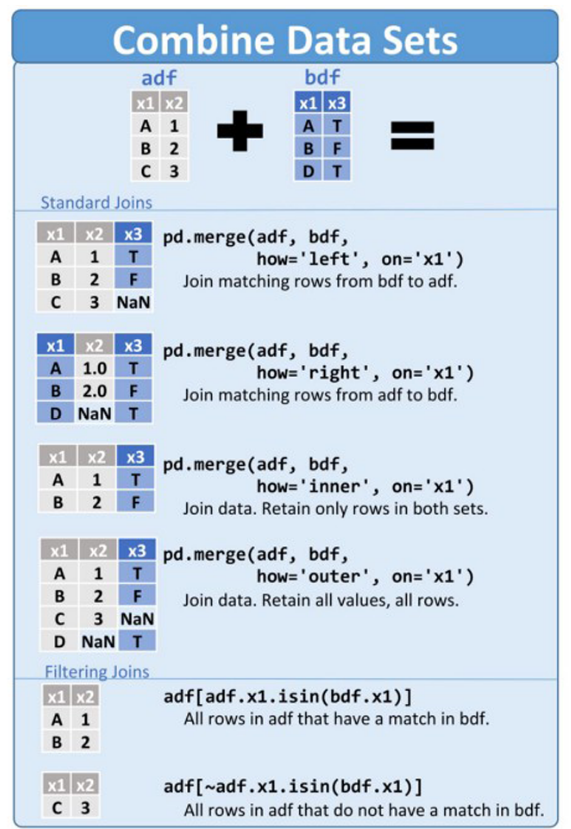

In [268]:
display(df.head(1))
display(b_code.head(1))

,index,축제명,시작일,종료일,주소,위도,경도,cat1,cat2,cat3
0,0,가족끼리 빙어체험 2021,20210116,20211231,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,37.5145504080,127.6574135888,A02,A0208,A02081300


,cat1,cat2,cat3,대분류,중분류,소분류
0,A01,A0101,A01010100,자연,자연관광지,국립공원


In [269]:
df_m=pd.merge(df,b_code, how='left', on='cat3')
df_m.head(3)

,index,축제명,시작일,종료일,주소,위도,경도,cat1_x,cat2_x,cat3,cat1_y,cat2_y,대분류,중분류,소분류
0,0,가족끼리 빙어체험 2021,20210116,20211231,경기도 양평군 단월면 곱다니길 55-2 수미마을 방문객센터,37.5145504080,127.6574135888,A02,A0208,A02081300,A02,A0208,인문(문화/예술/역사),공연/행사,기타행사
1,1,가족오페라 <마술피리> 2021,20210225,20210228,대구광역시 북구 호암로 15,35.8835072863,128.5922570230,A02,A0208,A02080400,A02,A0208,인문(문화/예술/역사),공연/행사,오페라
2,2,거창 크리스마스트리문화축제 2021,20201213,20210214,경상남도 거창군 거창읍 중앙로 103,35.6866949586,127.9095393091,A02,A0207,A02070200,A02,A0207,인문(문화/예술/역사),축제,일반축제


In [271]:
df_m.shape

(123, 15)

In [272]:
소분류별=df_m.groupby('소분류').count()['축제명']
소분류별

소분류
기타행사      23
문화관광축제     4
뮤지컬        3
박람회        4
연극         3
오페라        2
일반축제      76
전시회        5
전통공연       3
Name: 축제명, dtype: int64

In [273]:
소분류별=소분류별.sort_values(ascending=False)
소분류별

소분류
일반축제      76
기타행사      23
전시회        5
문화관광축제     4
박람회        4
뮤지컬        3
연극         3
전통공연       3
오페라        2
Name: 축제명, dtype: int64

<AxesSubplot:xlabel='소분류'>

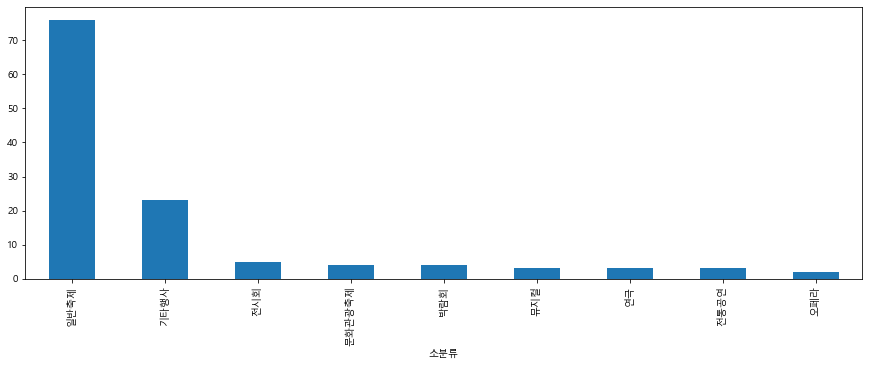

In [274]:
소분류별.plot(kind='bar',figsize=(15,5))

In [212]:
import folium
from folium.plugins import MarkerCluster

In [231]:
import folium
from folium.plugins import MarkerCluster

police=df_m
m = folium.Map(
  location=[36.5053542,127.7043419],
  zoom_start=7
)

 

marker_cluster = MarkerCluster().add_to(m)
 
for i in range(len(police)):
  folium.Marker(
    location=[police.위도[i],police.경도[i]],
    popup=police.축제명[i] + '시작일:'+police.시작일[i],
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)
 
m.save('map_사고.html')

In [275]:
m